In [ ]:
%pip install graphviz;
%pip install numpy;
%pip install matplotlib;
%pip install pauliarray-main/
%pip install rustworkx;
%pip install scipy;
# comment

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Processing c:\users\mason\documents\25-26\lab\pauli_arr\pauliarray-main
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for pauliarray: filename=pauliarray-0.0.1-py2.py3-none-any.whl size=51200 sha256=909c30480c82e9ac08532c9cba9c488c1364697855c7c52c4de7d33a8cf6f44a
  Stored in directory: c:\users\mason\appdata\local\pip\cache\wheels\e7\26\b1\f7e2b90d86f9e286f42b2e1102cc558397eeaf09fb7e41cbdb
Successfully built pauliarray
  Attempting uninstall: pauliarray
    Found existing installation: pauliarray 

In [45]:
import codecs
import pauliarray as pa
import numpy as np
import rustworkx as rx
from rustworkx.visualization import graphviz_draw
import matplotlib.pyplot as plt
import pauliarray.pauli.operator as op
import pauliarray.pauli.pauli_array as pa

In [4]:
rho0= pa.PauliArray.from_labels('IIIIIIIIZIIIIIII')
rho0 = op.Operator.from_paulis_and_weights(rho0, 1)

In [5]:
seed_str = 'X'
pad_width = 5
padded_seed = 'I'*pad_width + seed_str + 'I'*pad_width
n = len(padded_seed)


edges = [(k,(k+1)% n) for k in range(n)]

In [6]:
# Initialise a 2D array (a “matrix”) of 0s for all these, Bool type where 0 == False
ising_z = np.zeros((len(edges), n), dtype=bool)
# print(ising_z)
# print()
ising_x = np.zeros((len(edges), n), dtype=bool)
ff1_z = np.zeros((len(edges), n), dtype=bool)
ff1_x = np.zeros((len(edges), n), dtype=bool)
ff2_z = np.zeros((len(edges), n), dtype=bool)
ff2_x = np.zeros((len(edges), n), dtype=bool)
for idx, edge in enumerate(edges):
    # print([idx, edge])
    # print()
    ising_z[idx, edge] = True                   # for the 2D array, the first element indicates the row(s) to act, and the second element the column(s) to act on. In this case, one row (from idx) and two columns (from edge, which is a 2-element tuple)
    ff1_x[idx, edge] = True
    ff2_z[idx, edge] = True
    ff2_x[idx, edge] = True
print(ising_z)
print()
ising_hamiltonian = op.Operator.from_paulis_and_weights(pa.PauliArray(ising_z, ising_x), 1)
ff1_hamiltonian = op.Operator.from_paulis_and_weights(pa.PauliArray(ff1_z, ff1_x), -0.5)
ff2_hamiltonian = op.Operator.from_paulis_and_weights(pa.PauliArray(ff2_z, ff2_x), -0.5)
print(ising_hamiltonian.inspect())      # It’s just Sum of ZiZi+1 over all i in a ring of qubits
print()
print(ff1_hamiltonian.inspect())        # first part of flip flop hamiltonian as seen in spin chains exercise
print()
print(ff2_hamiltonian.inspect())        # second part of flip flop hamiltonian as seen in spin chains exercise
print()
# ========================================================
# # This hamiltonian is exactly the same as seen in the operator evolution and XXZ hamiltonian exercise
ham = ising_hamiltonian+ff1_hamiltonian+ff2_hamiltonian
print(ham.inspect())

[[ True  True False False False False False False False False False]
 [False  True  True False False False False False False False False]
 [False False  True  True False False False False False False False]
 [False False False  True  True False False False False False False]
 [False False False False  True  True False False False False False]
 [False False False False False  True  True False False False False]
 [False False False False False False  True  True False False False]
 [False False False False False False False  True  True False False]
 [False False False False False False False False  True  True False]
 [False False False False False False False False False  True  True]
 [ True False False False False False False False False False  True]]

Operator
Sum of
(+1.0000 +0.0000j) IIIIIIIIIZZ
(+1.0000 +0.0000j) IIIIIIIIZZI
(+1.0000 +0.0000j) IIIIIIIZZII
(+1.0000 +0.0000j) IIIIIIZZIII
(+1.0000 +0.0000j) IIIIIZZIIII
(+1.0000 +0.0000j) IIIIZZIIIII
(+1.0000 +0.0000j) IIIZZIIIIII
(+1.00

In [7]:
def generate_dipole_hamiltonian(n, neighbor_list=None):
    edges = neighbor_list if neighbor_list is not None else [(k,(k+1)% n) for k in range(n)]

    ising_z = np.zeros((len(edges), n), dtype=bool)
    ising_x = np.zeros((len(edges), n), dtype=bool)
    ff1_z = np.zeros((len(edges), n), dtype=bool)
    ff1_x = np.zeros((len(edges), n), dtype=bool)
    ff2_z = np.zeros((len(edges), n), dtype=bool)
    ff2_x = np.zeros((len(edges), n), dtype=bool)

    for idx, edge in enumerate(edges):
        # ZZ term
        ising_z[idx, edge] = True
        # XX term
        ff1_x[idx, edge] = True
        # YY term
        ff2_z[idx, edge] = True
        ff2_x[idx, edge] = True
        
    ising_hamiltonian = op.Operator.from_paulis_and_weights(pa.PauliArray(ising_z, ising_x), 1)
    ff1_hamiltonian = op.Operator.from_paulis_and_weights(pa.PauliArray(ff1_z, ff1_x), -0.5)
    ff2_hamiltonian = op.Operator.from_paulis_and_weights(pa.PauliArray(ff2_z, ff2_x), -0.5)
    return ising_hamiltonian+ff1_hamiltonian+ff2_hamiltonian

In [8]:
def generate_dq_hamiltonian(n, neighbor_list=None):
    edges = neighbor_list if neighbor_list is not None else [(k,(k+1)% n) for k in range(n)]

    dq1_z = np.zeros((len(edges), n), dtype=bool)
    dq1_x = np.zeros((len(edges), n), dtype=bool)
    dq2_z = np.zeros((len(edges), n), dtype=bool)
    dq2_x = np.zeros((len(edges), n), dtype=bool)

    for idx, edge in enumerate(edges):
        # XX term
        dq1_x[idx, edge] = True
        # YY term
        dq2_z[idx, edge] = True
        dq2_x[idx, edge] = True

    dq1_hamiltonian = op.Operator.from_paulis_and_weights(pa.PauliArray(dq1_z, dq1_x), 1)
    dq2_hamiltonian = op.Operator.from_paulis_and_weights(pa.PauliArray(dq2_z, dq2_x), -1)
    return dq1_hamiltonian + dq2_hamiltonian

In [9]:
edge1 = [(2,3)]
edge2 = [(3,4)]

ham1 = generate_dipole_hamiltonian(len(padded_seed), neighbor_list=edge1)
ham2 = generate_dipole_hamiltonian(len(padded_seed), neighbor_list=edge2)

In [10]:
print(ham1.inspect())
print(ham2.inspect())

Operator
Sum of
(-0.5000 +0.0000j) IIIIIIIXXII
(+1.0000 +0.0000j) IIIIIIIZZII
(-0.5000 +0.0000j) IIIIIIIYYII
Operator
Sum of
(-0.5000 +0.0000j) IIIIIIXXIII
(+1.0000 +0.0000j) IIIIIIZZIII
(-0.5000 +0.0000j) IIIIIIYYIII


In [11]:
print(op.commutator(ham1, ham2).inspect())

Operator
Sum of
(+0.0000 +1.0000j) IIIIIIZYXII
(+0.0000 +0.5000j) IIIIIIYZXII
(+0.0000 -1.0000j) IIIIIIXYZII
(+0.0000 +1.0000j) IIIIIIYXZII
(+0.0000 -0.5000j) IIIIIIXZYII
(+0.0000 -1.0000j) IIIIIIZXYII


In [ ]:
def generate_louivillian_graph(seed_label, ham, depth, corr_cutoff=4, max_nodes=None, directed=True, decay_factor=1.0):
    """
    Generate a rustworkx PyGraph representing successive commutators
    with `ham` starting from `seed_label` up to `depth` layers.

    Parameters
    - seed_label: str, Pauli string like 'IIIIIZIIIII'
    - ham: pauliarray.pauli.operator.Operator, the Hamiltonian/operator to commute with
    - depth: int, number of commutator layers to generate (depth=0 => only seed node)
    - max_nodes: int or None, optional cap on total nodes (prevents explosion)

    Returns
    - (graph, label_to_idx) tuple where graph is rx.PyGraph and label_to_idx is a dict
      mapping pauli-label -> node index in the graph.
    """
    g = rx.PyDiGraph(multigraph=False) if directed else rx.PyGraph(multigraph=False)
    label_to_idx = {}

    # add root
    root_idx = g.add_node(seed_label)
    label_to_idx[seed_label] = root_idx
    
    current_layer = [root_idx]
    if depth <= 0:
        return g, label_to_idx

    for _layer in range(depth):
        next_layer = []
        for node_idx in current_layer:
            label = g.get_node_data(node_idx)
            # build operator from the label and commute
            pauli_arr = pa.PauliArray.from_labels(label)
            node_op = op.Operator.from_paulis_and_weights(pauli_arr, 1)
            o_next = op.commutator(ham, node_op)
            o_next.combine_repeated_terms(True)

            for p, w in zip(o_next.paulis, o_next.weights):
                lab = p.to_labels()[0]
                lab_strip = lab.replace('I', '')
                w = np.real(1j * w)  # Liouvillian commutator factor
                
                if len(lab_strip) > corr_cutoff:
                    # connect to itself with "imaginary" self-energy, so the effective term will be
                    # d/dt(A) = -decay_factor * A 
                    g.add_edge(node_idx, node_idx, -1 * decay_factor)
                    continue
                if lab in label_to_idx:
                    # node already exists, get its index
                    # prune duplicate nodes and combine
                    new_idx = label_to_idx[lab]
                else:
                    # new node, add to graph and enforce optional node cap
                    if max_nodes is not None and len(label_to_idx) >= max_nodes:
                        continue
                    new_idx = g.add_node(lab)
                    next_layer.append(new_idx)
                    label_to_idx[lab] = new_idx

                # add edge from initial to target pauli, with the relevant matrix element
                g.add_edge(node_idx, new_idx, w)

        current_layer = next_layer
        if not current_layer:
            break

    return g, label_to_idx

In [13]:
graph, label_map = generate_louivillian_graph(padded_seed, ham, depth=2, max_nodes=1000)

In [46]:
from rustworkx.visualization import graphviz_draw

def node_attr(node):
    s = str(node)
    parts = [f"{ch}" for  ch in s if ch != "I"]
    """
    """
    parts = []
    for chno, ch in enumerate(s):
        if ch != "I":
            if chno < 10:
                parts.append(codecs.decode(fr"{ch}\u208{chno}",'unicode_escape'))        # count from qubit 0 to qubit 10 (add +1 if qubit 1 to 11)
            elif 10 <= chno < 100:
                parts.append(codecs.decode(fr"{ch}\u208{chno//10}\u208{chno%10}",'unicode_escape'))


    count = len(parts)
    if count == 0:
        return {"label": s}
    # base blue intensity for one non-'I' char, reduce for each additional char
    base = 255
    decrement = 50
    blue = max(30, base - (count - 1) * decrement)
    hex_color = f"#{0:02x}{0:02x}{blue:02x}"
    # return early so the final return isn't reached
    return {"label": " ".join(parts), "color": "blue" if count == 1 else "red", "fillcolor": "blue" if count == 1 else "red", "style": "filled", "fontcolor": "white", "shape": "ellipse", "fontsize": "10", "width": "0.5", "height": "0.5", "fixedsize": "true"}
    #return {"label": " ".join(parts) if parts else s}
    
def edge_attr(edge):
    w = edge
    return {"label": f"{np.real(w):.2f}"}
    

In [ ]:
from scipy.linalg import expm

def exp_action_via_eig(mat, vec, t):
    """
    Compute exp(mat * t) @ vec using eigendecomposition with a scipy fallback.
    mat: (n,n) ndarray
    vec: (n,) ndarray
    t: scalar
    """
    mat = np.asarray(mat)
    vec = np.asarray(vec)
    assert mat.shape[0] == mat.shape[1] == vec.shape[0]
    # try diagonalization
    vals, vecs = np.linalg.eig(mat)
    # if eigenvector matrix is ill-conditioned, fallback to scipy.linalg.expm if available
    if np.linalg.cond(vecs) > 1e12:
        try:
            M = expm(mat * t)
            res = M.dot(vec)
            return np.real_if_close(res)
        except Exception:
            raise RuntimeError("Matrix appears nearly defective; install scipy or use a numerical integrator.")
    expD = np.diag(np.exp(vals * t))
    M = vecs.dot(expD).dot(np.linalg.inv(vecs))
    return np.real_if_close(M.dot(vec))


from scipy.integrate import solve_ivp

def solve_chain_time_series(chain_mat, A0, times, max_step=.01):
    """
    Compute A(t) = exp(chain_mat * t) @ A0 for an array of times.
    chain_mat: (n,n) ndarray
    A0: (n,) ndarray initial condition
    times: 1D array-like of times
    Returns: (len(times), n) ndarray
    """
    times = np.asarray(times)
    A0 = np.asarray(A0)
    
    def rhs(t, y):
        return chain_mat @ y

    sol = solve_ivp(rhs, (times[0], times[-1]), A0, t_eval=times, method='RK45',max_step=max_step)
    return sol.y.T



In [ ]:
seed_str = 'Z'
pad_width = 5 # number of qubits
padded_seed = 'I'*pad_width + seed_str + 'I'*pad_width
ham = generate_dipole_hamiltonian(len(padded_seed))
root_idx = 0  # since seed is the first node added

In [56]:
#graph_2, label_map_2 = generate_louivillian_graph(padded_seed, ham, depth=10, corr_cutoff=10, max_nodes=100000, directed=True)
graph_2, label_map_2 = generate_louivillian_graph(padded_seed, ham, depth=3, corr_cutoff=3, max_nodes=100000, directed=True)
#graphviz_draw(graph_2, node_attr_fn=node_attr, edge_attr_fn=edge_attr, method='sfdp')

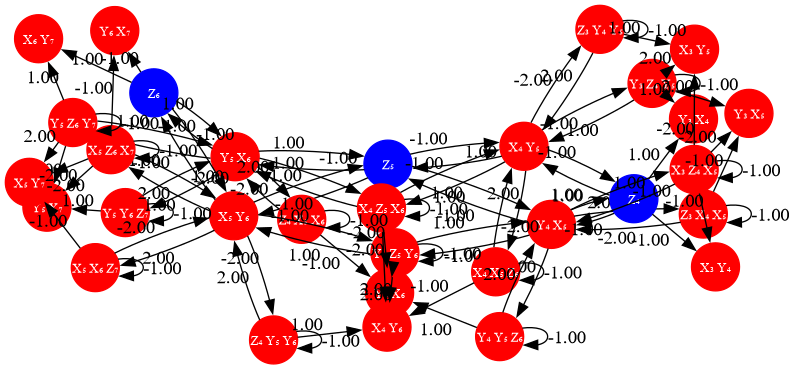

In [57]:
graphviz_draw(graph_2, node_attr_fn=node_attr, edge_attr_fn=edge_attr, method='sfdp')

In [41]:
chain_mat_2 =  rx.adjacency_matrix(graph_2,weight_fn= lambda x: x).T
# Example usage with the notebook's variables:
n = chain_mat_2.shape[0]
A0 = np.zeros(n)
# set initial occupancy on the root node (root_idx exists in the notebook)
A0[0] = 1.0

times = np.linspace(0.0, 10.0, 100)  # adjust as needed
A_t = solve_chain_time_series(chain_mat_2, A0, times,max_step=0.001)

# print a small summary
print("A(t) shape:", A_t.shape)
print("A(0) :", A_t[0])

A(t) shape: (100, 5165)
A(0) : [1. 0. 0. ... 0. 0. 0.]


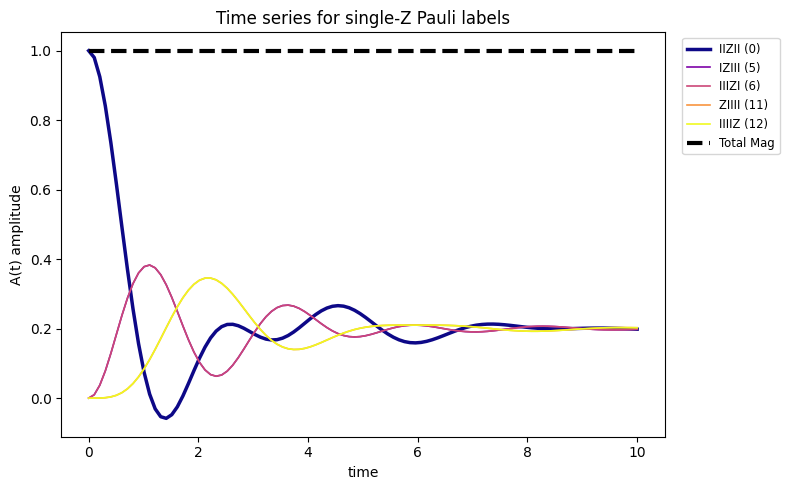

In [145]:
# Filter for labels with exactly one 'Z'
zi_items = [(lab, idx) for lab, idx in label_map_2.items() if set(lab) <= {"I", "Z"}]
single_z_items = [(lab, idx) for lab, idx in zi_items if lab.count('Z') == 1]

if not single_z_items:
    print("No single-Z labels found in zi_items.")
else:
    # Sort by node index for stable ordering
    single_z_items = sorted(single_z_items, key=lambda x: x[1])
    labels = [lab for lab, _ in single_z_items]
    idxs = [idx for _, idx in single_z_items]

    total_z = np.zeros(len(times))
    plt.figure(figsize=(8, 5))
    cmap = plt.get_cmap("plasma")
    for k, (lab, idx) in enumerate(zip(labels, idxs)):
        color = cmap(k / max(1, len(labels) - 1))
        lw = 2.5 if idx == root_idx else 1.2
        total_z += A_t[:, idx]
        plt.plot(times, A_t[:, idx], label=f"{lab} ({idx})", color=color, linewidth=lw)

    plt.plot(times, total_z, label="Total Mag", color="black", linewidth=3, linestyle="--")
    plt.xlabel("time")
    plt.ylabel("A(t) amplitude")
    plt.title("Time series for single-Z Pauli labels")
    plt.legend(fontsize="small", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

In [146]:
graph_3, label_map_3 = generate_louivillian_graph(padded_seed, ham, depth=10, corr_cutoff=4, max_nodes=1000, directed=True)
#graphviz_draw(graph_3, node_attr_fn=node_attr, edge_attr_fn=edge_attr, method='sfdp')

In [147]:
chain_mat_3 =  rx.adjacency_matrix(graph_3,weight_fn= lambda x: x).T
# Example usage with the notebook's variables:
n = chain_mat_3.shape[0]
A0 = np.zeros(n)
# set initial occupancy on the root node (root_idx exists in the notebook)
A0[0] = 1.0

times = np.linspace(0.0, 10.0, 100)  # adjust as needed
A_t = solve_chain_time_series(chain_mat_3, A0, times,max_step=0.001)


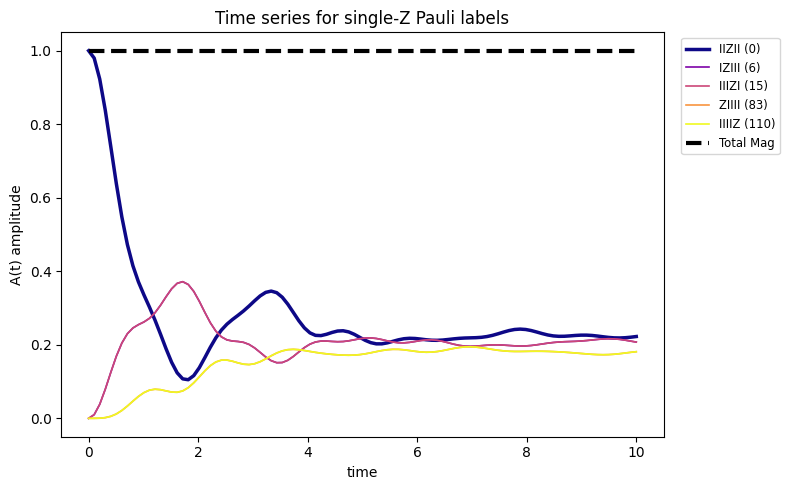

In [148]:
# Filter for labels with exactly one 'Z'
zi_items = [(lab, idx) for lab, idx in label_map_3.items() if set(lab) <= {"I", "Z"}]
single_z_items = [(lab, idx) for lab, idx in zi_items if lab.count('Z') == 1]

if not single_z_items:
    print("No single-Z labels found in zi_items.")
else:
    # Sort by node index for stable ordering
    single_z_items = sorted(single_z_items, key=lambda x: x[1])
    labels = [lab for lab, _ in single_z_items]
    idxs = [idx for _, idx in single_z_items]

    total_z = np.zeros(len(times))
    plt.figure(figsize=(8, 5))
    cmap = plt.get_cmap("plasma")
    for k, (lab, idx) in enumerate(zip(labels, idxs)):
        color = cmap(k / max(1, len(labels) - 1))
        lw = 2.5 if idx == root_idx else 1.2
        total_z += A_t[:, idx]
        plt.plot(times, A_t[:, idx], label=f"{lab} ({idx})", color=color, linewidth=lw)

    plt.plot(times, total_z, label="Total Mag", color="black", linewidth=3, linestyle="--")
    plt.xlabel("time")
    plt.ylabel("A(t) amplitude")
    plt.title("Time series for single-Z Pauli labels")
    plt.legend(fontsize="small", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

In [149]:
graph_4, label_map_4 = generate_louivillian_graph(padded_seed, ham, depth=10, corr_cutoff=5, max_nodes=1000, directed=True)

In [150]:
chain_mat_4 =  rx.adjacency_matrix(graph_4,weight_fn= lambda x: x).T
# Example usage with the notebook's variables:
n = chain_mat_4.shape[0]
A0 = np.zeros(n)
# set initial occupancy on the root node (root_idx exists in the notebook)
A0[0] = 1.0

times = np.linspace(0.0, 10.0, 100)  # adjust as needed
A_t = solve_chain_time_series(chain_mat_4, A0, times,max_step=0.001)

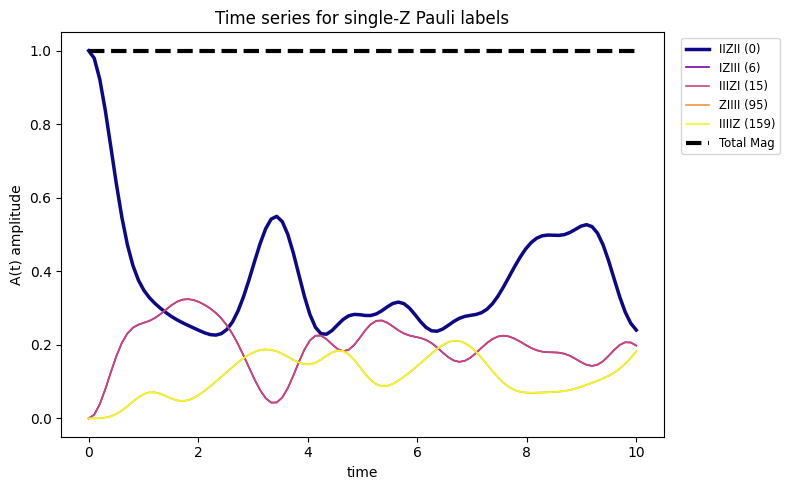

In [151]:
# Filter for labels with exactly one 'Z'
zi_items = [(lab, idx) for lab, idx in label_map_4.items() if set(lab) <= {"I", "Z"}]
single_z_items = [(lab, idx) for lab, idx in zi_items if lab.count('Z') == 1]

if not single_z_items:
    print("No single-Z labels found in zi_items.")
else:
    # Sort by node index for stable ordering
    single_z_items = sorted(single_z_items, key=lambda x: x[1])
    labels = [lab for lab, _ in single_z_items]
    idxs = [idx for _, idx in single_z_items]

    total_z = np.zeros(len(times))
    plt.figure(figsize=(8, 5))
    cmap = plt.get_cmap("plasma")
    for k, (lab, idx) in enumerate(zip(labels, idxs)):
        color = cmap(k / max(1, len(labels) - 1))
        lw = 2.5 if idx == root_idx else 1.2
        total_z += A_t[:, idx]
        plt.plot(times, A_t[:, idx], label=f"{lab} ({idx})", color=color, linewidth=lw)

    plt.plot(times, total_z, label="Total Mag", color="black", linewidth=3, linestyle="--")
    plt.xlabel("time")
    plt.ylabel("A(t) amplitude")
    plt.title("Time series for single-Z Pauli labels")
    plt.legend(fontsize="small", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

In [152]:
from scipy.special import comb
def pauli_to_mqc(p_string, basis="Z"):
    r"""
    Take a Pauli string and return a dictionary mapping MQC orders to their coefficients
    in the given basis. The MQC order of an operators Oq is defined in a basis of the 
    (collective) operator P = \sum_i \sigma_mu^{(i)} as [P, Oq ] = q Oq. When P is a 
    Pauli-Z, the MQC order can be computed by counting the number of sigma_+ operators minus
    the number of sigma_- operators in the Pauli string.
    """
    mqc = {}
    match basis:
        case "Z":
            num_x = p_string.count('X')
            num_y = p_string.count('Y')
            n = num_x + num_y
            for nminus in range(0, 2*n+1, 2):
                mqc[n-nminus] = (1j)**num_y * np.sum([comb(num_x, k)*comb(num_y, nminus//2-k)*((-1)**(nminus//2 - k) ) for k in range(0, nminus//2+1)])
        case "X":
            pass  # implement later
        case "Y":
            pass  # implement later
        case _:
            raise ValueError(f"Unknown basis: {basis}")
        
    return mqc


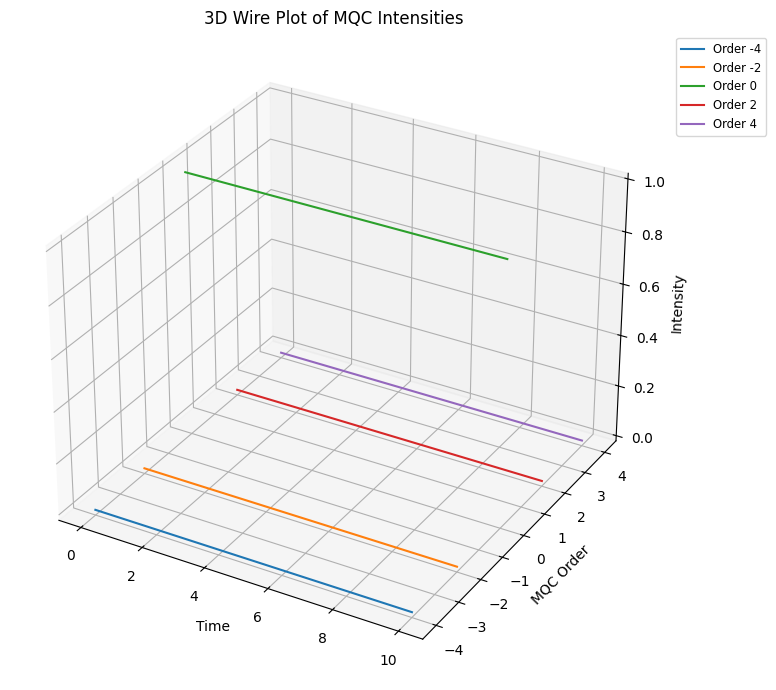

In [153]:
# Compute MQC intensities
mqc_intensity = {}
for label, idx in label_map_4.items():
    mqc_orders = pauli_to_mqc(label)
    for order, coeff in mqc_orders.items():
        if order not in mqc_intensity:
            mqc_intensity[order] = np.zeros(len(times),dtype=np.complex128)
        mqc_intensity[order] += coeff * A_t[:, idx]

mqc_intensity = {order: np.abs(intensity)**2 for order, intensity in mqc_intensity.items()}
# Create a 3D wire plot for MQC intensities

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

orders = sorted(mqc_intensity.keys())
X, Y = np.meshgrid(times, orders)
Z = np.array([mqc_intensity[order] for order in orders])

for i in range(len(orders)):
    ax.plot(times, [orders[i]] * len(times), Z[i], label=f"Order {orders[i]}")

ax.set_xlabel("Time")
ax.set_ylabel("MQC Order")
ax.set_zlabel("Intensity")
ax.set_title("3D Wire Plot of MQC Intensities")
plt.legend(fontsize="small", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()


In [154]:
def compute_time_evolution(graph, A0, times, weight_fn=lambda x: x, max_step=0.01):
    """
    Compute the time evolution of a system represented by a Liouvillian graph.

    Parameters:
    - graph: rustworkx.PyDiGraph or rustworkx.PyGraph
        The Liouvillian graph representing the system.
    - A0: numpy.ndarray
        The initial state vector.
    - times: numpy.ndarray
        Array of time points for the evolution.
    - weight_fn: callable, optional
        A function to extract weights from graph edges. Defaults to identity.
    - max_step: float, optional
        Maximum step size for the numerical integrator.

    Returns:
    - A_t: numpy.ndarray
        The time-evolved state vector at each time point.
    """
    # Generate the adjacency matrix using rustworkx
    chain_mat = rx.adjacency_matrix(graph, weight_fn=weight_fn).T

    # Solve the time evolution using the solve_chain_time_series function
    A_t = solve_chain_time_series(chain_mat, A0, times, max_step=max_step)
    return A_t

In [155]:
def plot_mqc_from_label_map(label_map, A_t, times=None):
    """
    Generate an MQC plot from a label_map and time-evolved operator weights.

    Parameters:
    - label_map: dict, mapping of Pauli labels to indices in A_t
    - A_t: numpy.ndarray, time-evolved operator weights (shape: [len(times), n])
    - times: numpy.ndarray, array of time points

    Returns:
    - None, displays the MQC plot
    """
    # Compute MQC intensities
    mqc_intensity = {}
    if times is None:
        times = np.arange(A_t.shape[0])
    for label, idx in label_map.items():
        mqc_orders = pauli_to_mqc(label)
        for order, coeff in mqc_orders.items():
            if order not in mqc_intensity:
                mqc_intensity[order] = np.zeros(len(times), dtype=np.complex128)
            mqc_intensity[order] += coeff * A_t[:, idx]

    # Convert to intensity (magnitude squared)
    mqc_intensity = {order: np.abs(intensity)**2 for order, intensity in mqc_intensity.items()}

    # Create a 3D wire plot for MQC intensities
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_subplot(111, projection='3d')

    orders = sorted(mqc_intensity.keys())
    X, Y = np.meshgrid(times, orders)
    Z = np.array([mqc_intensity[order] for order in orders])

    for i in range(len(orders)):
        ax.plot(times, [orders[i]] * len(times), Z[i], label=f"Order {orders[i]}")

    ax.set_xlabel("Time")
    ax.set_ylabel("MQC Order")
    ax.set_zlabel("Intensity")
    ax.set_title("3D Wire Plot of MQC Intensities")
    plt.legend(fontsize="small", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()
    
    # Compute the second moment of the MQC intensity (OTOC)
    otoc = np.zeros(len(times))
    for order, intensity in mqc_intensity.items():
        otoc += order**2 * intensity

    # Plot the OTOC as a function of time
    plt.figure(figsize=(6, 4))
    plt.plot(times, otoc, label="OTOC", color="purple", linewidth=2)
    plt.xlabel("Time")
    plt.ylabel("OTOC")
    plt.title("Out-of-Time-Ordered Correlator (OTOC) vs Time")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

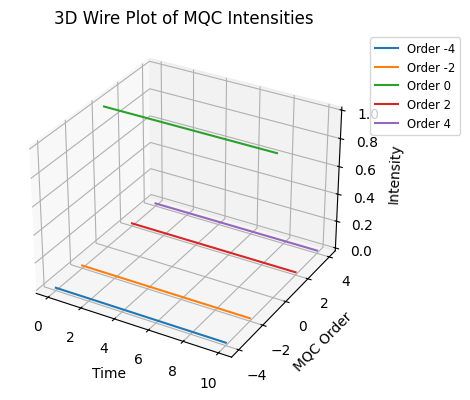

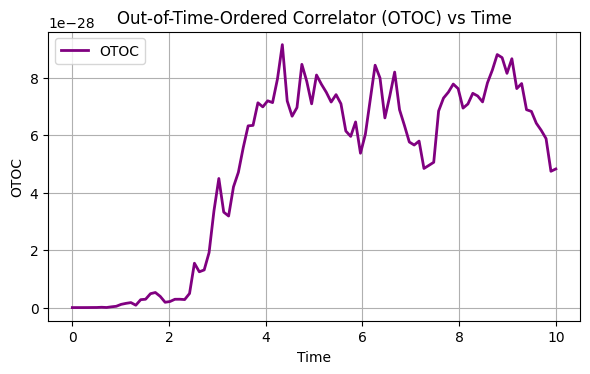

In [156]:
plot_mqc_from_label_map(label_map_4, A_t, times)

In [157]:
pad=15
padded_seed = 'I'*pad + 'Z' + 'I'*pad

In [158]:
dq = generate_dq_hamiltonian(len(padded_seed))
graph_dq, label_map_dq = generate_louivillian_graph(padded_seed, dq, depth=len(padded_seed)*2, corr_cutoff=len(padded_seed), max_nodes=100000, directed=True)    

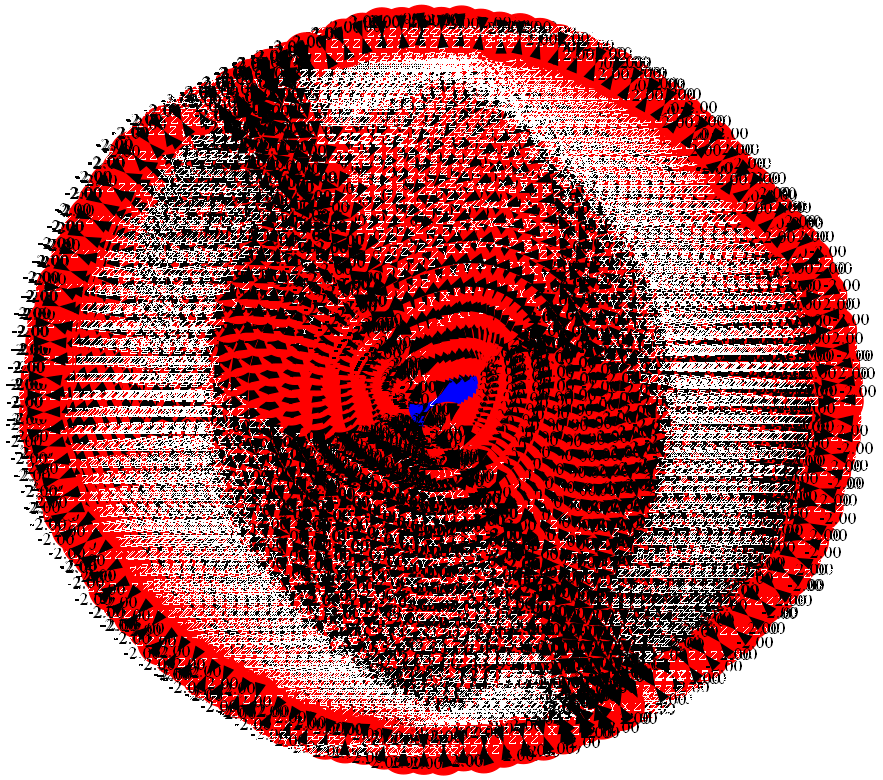

In [159]:
graphviz_draw(graph_dq, node_attr_fn=node_attr, edge_attr_fn=edge_attr, method='sfdp')

In [160]:
A0 = np.zeros(len(label_map_dq))
A0[0] = 1.0  # initial occupancy on root node
times = np.linspace(0.0, 5.0, 500)  
A_t = compute_time_evolution(graph_dq, A0, times)

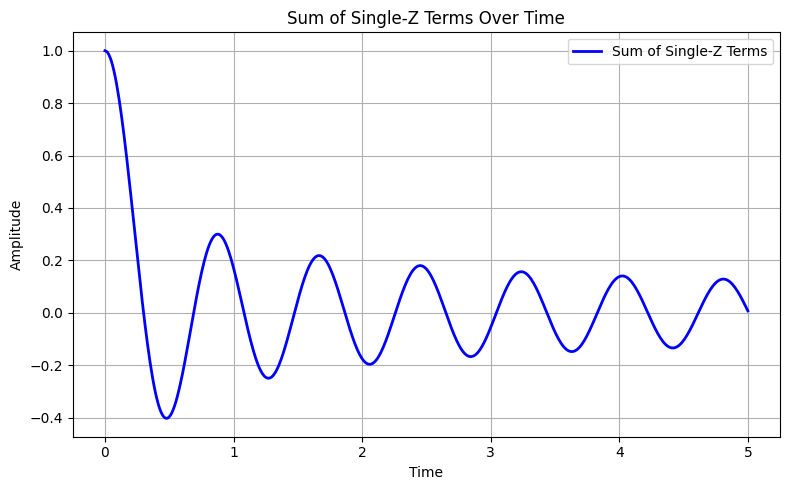

In [161]:
from scipy.special import j0

# Filter for labels with exactly one 'Z' and the rest 'I's
single_z_items = [(lab, idx) for lab, idx in label_map_dq.items() if set(lab) <= {"I", "Z"} and lab.count('Z') == 1]

if not single_z_items:
    print("No single-Z labels found in label_map_dq.")
else:
    # Extract indices for the relevant nodes
    idxs = [idx for _, idx in single_z_items]

    # Compute the sum of the corresponding terms in A_t
    total_single_z = np.sum(A_t[:, idxs], axis=1)

    # Plot the result
    plt.figure(figsize=(8, 5))
    plt.plot(times, total_single_z, label="Sum of Single-Z Terms", color="blue", linewidth=2)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.title("Sum of Single-Z Terms Over Time")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

Fitted parameters: Amplitude = 0.9999999931456336, Frequency = 1.2732395465583866, Phase = -1.5882628369222374e-08


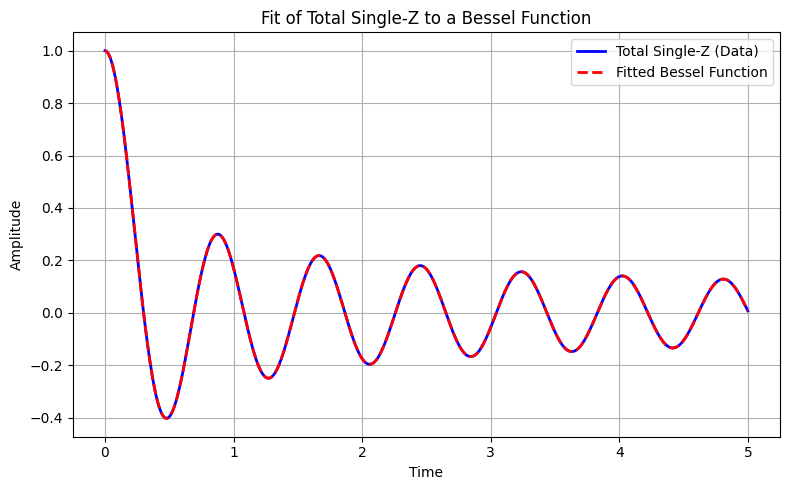

In [162]:
from scipy.optimize import curve_fit
from scipy.special import j0
import numpy as np

# Define the Bessel function model
def bessel_model(t, amplitude, frequency, phase):
    return amplitude * j0(2 * np.pi * frequency * t + phase)

# Perform the curve fitting
initial_guess = [1.0, 1.25, 0.0]  # Initial guesses for amplitude, frequency, and phase
params, covariance = curve_fit(bessel_model, times, total_single_z, p0=initial_guess)

# Extract the fitted parameters
amplitude_fit, frequency_fit, phase_fit = params
print(f"Fitted parameters: Amplitude = {amplitude_fit}, Frequency = {frequency_fit}, Phase = {phase_fit}")

# Generate the fitted curve
fitted_curve = bessel_model(times, amplitude_fit, frequency_fit, phase_fit)

# Plot the original data and the fitted curve
plt.figure(figsize=(8, 5))
plt.plot(times, total_single_z, label="Total Single-Z (Data)", color="blue", linewidth=2)
plt.plot(times, fitted_curve, label="Fitted Bessel Function", color="red", linestyle="--", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title("Fit of Total Single-Z to a Bessel Function")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

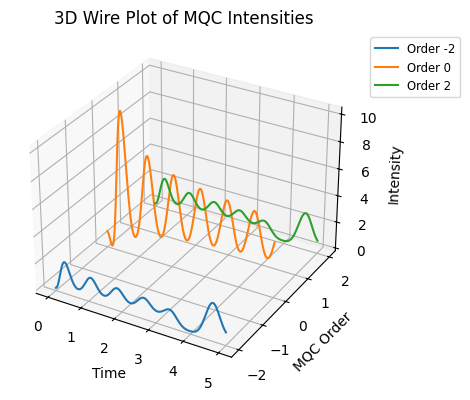

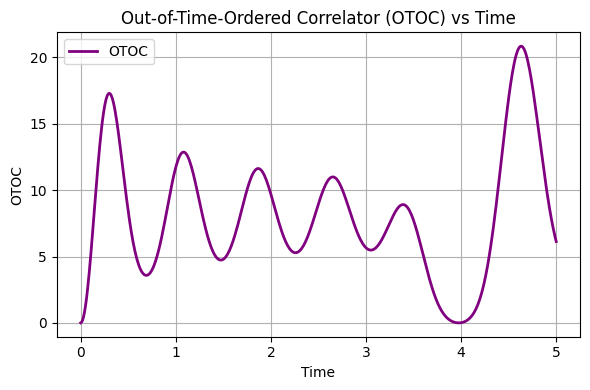

In [163]:
plot_mqc_from_label_map(label_map_dq, A_t, times)